# Train in Human in the loop (HITL)




In [5]:
# Récuper les labels des noms des images dans le dossier

# parcourir dossier et lister les noms pour récuperer les labels
import os
data_dir = './../data/raw2/train/images/'

noms = sorted(os.listdir(data_dir))
classes = ['biodegradable', 'cardboard', 'glass', 'metal', 'paper', 'plastic']

# Si dans les noms qui sont dans labels il y a des noms qui sont dans classes, netoyer labels et garder que noms de classes
labels = []
for name in noms:
    for c in classes:
        if name.startswith(c):
            labels.append(c)
            break
print(labels)

['biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradabl

In [6]:
for i in range(len(labels)):
    if labels[i] == 'biodegradable':
        labels[i] = 'trash'

print(labels)

['trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 

In [7]:
# Labels:
#    0: cardboard
#    1: glass
#    2: metal
#    3: paper
#    4: plastic
#    5: trash

def transform_labels_to_int(label : str) -> int:
    match labels:
        case 'cardboard':
            return 0
        case 'glass':
            return 1
        case 'metal':
            return 2
        case 'paper':
            return 3
        case 'plastic':
            return 4
        case 'trash':
            return 5


In [8]:
import os
import random
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
# Set the random seed for reproducibility
seed = 77

os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

tf.random.set_seed(seed)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

In [10]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

In [11]:
ds = tf.keras.utils.image_dataset_from_directory(
    "../data/raw2/train/images/.",
    labels=None,
    label_mode=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=seed,
    verbose=1,
)

Found 6094 files.


2025-12-11 16:16:49.247440: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
ds.element_spec

TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)

2025-12-11 16:16:50.311444: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


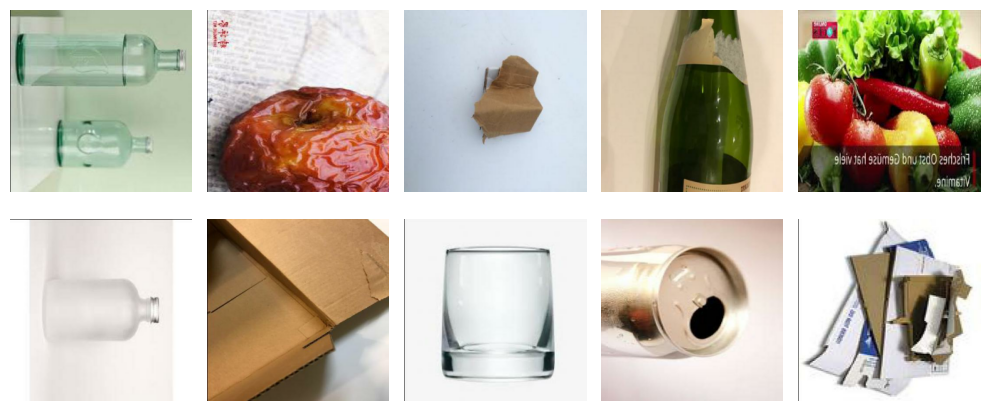

In [13]:
# Plot 10 sample images
plt.figure(figsize=(10, 5), tight_layout=True)
for images in ds.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [14]:
# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(
    1.0 / 255
)
ds = ds.map(lambda x: normalization_layer(x))

In [16]:
# Importer le modèle pré-entraîné de Artifact Registry Google with bentoml

# dvc pull (dossier model)
# bentoml models import /home/cris/mlops/MLOps-project/model/trash_classifier_model.bentomodel
# mettre le chemin absolu du fichier .bentomodel

import bentoml
from bentoml.keras import load_model

# Récupérer la dernière version du modèle importé
model_ref = bentoml.models.get("trash_classifier_model:latest")
print(model_ref)

Model(tag="trash_classifier_model:ciqmwpguswhiypxm")


/tmp/ipykernel_10546/638817549.py:8: BentoMLDeprecationWarning: `bentoml.keras` is deprecated since BentoML v1.4 and will be removed in a future version.
  from bentoml.keras import load_model


In [17]:
# Charger le modèle Keras
model = load_model(model_ref)

In [18]:
import numpy as np
from pathlib import Path

history_path = Path("../model/history.npy")
history = np.load(history_path, allow_pickle=True).item()

prev_epochs = len(history["loss"])
print("Epochs déjà entraînées :", prev_epochs)

Epochs déjà entraînées : 9


In [19]:
# evaluer dataset
preds= model.predict(ds)
#predictions=tf.argmax(preds, axis=1)

191/191 ━━━━━━━━━━━━━━━━━━━━ 135s 697ms/step


In [20]:
probs = tf.nn.softmax(preds, axis=-1).numpy() # # (N, num_classes)

In [21]:
probs[1]

array([1.03795275e-08, 8.03286824e-08, 2.34495889e-08, 9.99999881e-01,
       8.46980974e-09, 2.91570021e-08], dtype=float32)

In [22]:
# index de la classe prédite pour chaque image
y_pred = np.argmax(probs, axis=-1)         # (N,)

# label prédit pour chaque image
y_true = [transform_labels_to_int(label) for label in labels]

In [24]:
# si la probabilité maximale est inférieure à un seuil, alors on considère que le modèle n'est pas sûr de sa prédiction
threshold = 0.7
uncertain_indices = [i for i, p in enumerate(probs) if np.max(p) < threshold]
print("Indices des images incertaines :", uncertain_indices)

# placer dans un dossier "uncertain_images" les images correspondantes aux indices incertains
import shutil
uncertain_dir = Path("../data/uncertain_images")
uncertain_dir.mkdir(parents=True, exist_ok=True)        
for i in uncertain_indices:
    src = Path(data_dir) / noms[i]
    dst = uncertain_dir / noms[i]
    shutil.copy(src, dst)
print(f"Images incertaines copiées dans le dossier {uncertain_dir}")
print("Prédictions :", y_pred)

Indices des images incertaines : [11, 19, 20, 38, 69, 70, 72, 75, 99, 102, 129, 146, 170, 184, 218, 230, 242, 258, 259, 279, 282, 283, 284, 285, 317, 319, 320, 331, 346, 356, 361, 363, 385, 389, 410, 414, 416, 431, 432, 456, 475, 489, 493, 500, 510, 550, 562, 576, 611, 644, 657, 671, 690, 692, 695, 703, 711, 743, 759, 762, 763, 764, 765, 769, 780, 789, 792, 793, 800, 806, 833, 840, 872, 901, 947, 948, 950, 953, 957, 959, 961, 978, 982, 989, 997, 1010, 1022, 1029, 1030, 1039, 1061, 1065, 1067, 1070, 1077, 1101, 1109, 1114, 1116, 1128, 1132, 1165, 1190, 1215, 1216, 1220, 1228, 1231, 1257, 1263, 1271, 1273, 1285, 1300, 1306, 1310, 1317, 1322, 1325, 1334, 1339, 1347, 1349, 1351, 1369, 1381, 1390, 1391, 1406, 1407, 1409, 1413, 1437, 1449, 1451, 1464, 1465, 1489, 1491, 1493, 1495, 1497, 1519, 1521, 1527, 1530, 1576, 1582, 1591, 1606, 1615, 1616, 1620, 1628, 1632, 1633, 1638, 1644, 1646, 1647, 1657, 1677, 1680, 1684, 1688, 1699, 1706, 1707, 1722, 1733, 1736, 1755, 1756, 1794, 1807, 1814, 1815

Annotation of uncertain images with Label Studio ...

In [ ]:
# prendre le fichier annotations.csv exporté de label studio
import pandas as pd
annotations_df = pd.read_csv("../data/uncertain_images/annotations.csv")

# réentreîner le modèle avec les nouvelles annotations 